In [1]:
pip install yfinance prophet matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install --upgrade yfinance



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install mplfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install mplfinance
#Import libraries to use
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from scipy.stats import randint

import warnings
warnings.filterwarnings('ignore')

import joblib
from datetime import datetime

from mplfinance.original_flavor import candlestick_ohlc
import mplfinance as mpf
import matplotlib.dates as mpl_dates

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
coins = "BTC,ETH"
coin_list = coins.split(",")  # ['BTC', ' ETH'...]
coin_dictionary = {coin:coin_list.index(coin) for coin in coin_list}

In [6]:
import pandas as pd
import yfinance as yf

coin_list = ["BTC", "ETH", "LTC"]  # example list
df_list = []

for coin in coin_list:
    crypto2 = yf.Ticker(f"{coin}-USD").history(
        start="2022-01-01", 
        end="2025-02-18", 
        interval="1d"
    )
    crypto2 = pd.DataFrame(crypto2)
    crypto2["crypto_name"] = coin
    df_list.append(crypto2)

# Combine all individual DataFrames
crypto = pd.concat(df_list)

crypto.reset_index(inplace=True)
crypto.drop(["Stock Splits", "Dividends"], axis=1, inplace=True)

crypto["year"] = crypto["Date"].dt.year
crypto["month"] = crypto["Date"].dt.month

crypto.to_csv("mycrypto.csv", index=False)


EDA OF THE DATA

In [7]:
crypto.head()

,Date,Open,High,Low,Close,Volume,crypto_name,year,month
0,2022-01-01 00:00:00+00:00,46311.746094,47827.312500,46288.484375,47686.812500,24582667004,BTC,2022,1
1,2022-01-02 00:00:00+00:00,47680.925781,47881.406250,46856.937500,47345.218750,27951569547,BTC,2022,1
2,2022-01-03 00:00:00+00:00,47343.542969,47510.726562,45835.964844,46458.117188,33071628362,BTC,2022,1
3,2022-01-04 00:00:00+00:00,46458.851562,47406.546875,45752.464844,45897.574219,42494677905,BTC,2022,1
4,2022-01-05 00:00:00+00:00,45899.359375,46929.046875,42798.222656,43569.003906,36851084859,BTC,2022,1


In [8]:
# This code is used to check for null values
crypto.isnull().sum()

Date           0
Open           0
High           0
Low            0
Close          0
Volume         0
crypto_name    0
year           0
month          0
dtype: int64

In [9]:
#information about the dataset
crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3432 entries, 0 to 3431
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Date         3432 non-null   datetime64[ns, UTC]
 1   Open         3432 non-null   float64            
 2   High         3432 non-null   float64            
 3   Low          3432 non-null   float64            
 4   Close        3432 non-null   float64            
 5   Volume       3432 non-null   int64              
 6   crypto_name  3432 non-null   object             
 7   year         3432 non-null   int32              
 8   month        3432 non-null   int32              
dtypes: datetime64[ns, UTC](1), float64(4), int32(2), int64(1), object(1)
memory usage: 214.6+ KB


In [10]:
#The statistics of my data
crypto.describe()

,Open,High,Low,Close,Volume,year,month
count,3432.000000,3432.000000,3432.000000,3432.000000,3.432000e+03,3432.00000,3432.000000
mean,15271.890532,15570.348789,14971.576486,15285.987037,1.486783e+10,2023.08479,6.305070
std,24065.243020,24545.273225,23590.211193,24098.449558,1.678948e+10,0.89435,3.533146
min,43.314003,46.132015,40.680405,43.300301,1.207859e+08,2022.00000,1.000000
25%,94.075684,95.826584,91.636749,94.077974,7.220928e+08,2022.00000,3.000000
50%,2185.451416,2231.200073,2117.026367,2185.782104,1.116763e+10,2023.00000,6.000000
75%,25833.174805,26092.786133,25415.550293,25832.505859,2.224461e+10,2024.00000,9.000000
max,106147.296875,109114.882812,105291.734375,106146.265625,1.492189e+11,2025.00000,12.000000


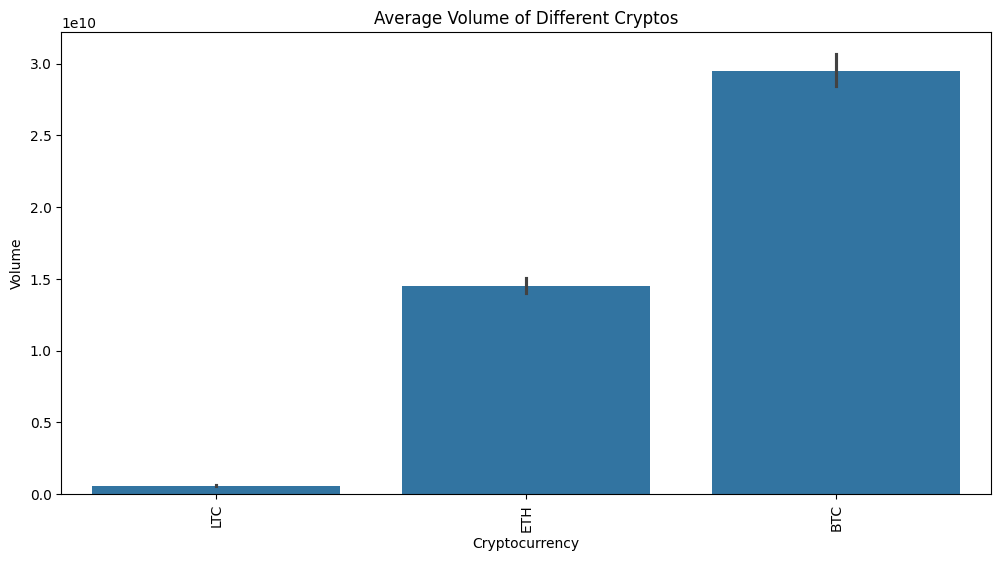

In [11]:
#bar plot of the cryptos
crypto_sorted = crypto.sort_values('Volume')
plt.figure(figsize=(12,6))
sns.barplot(x='crypto_name', y='Volume', data=crypto_sorted, estimator=np.mean)
plt.xticks(rotation=90)
plt.xlabel('Cryptocurrency')
plt.ylabel('Volume')
plt.title('Average Volume of Different Cryptos')
plt.show()

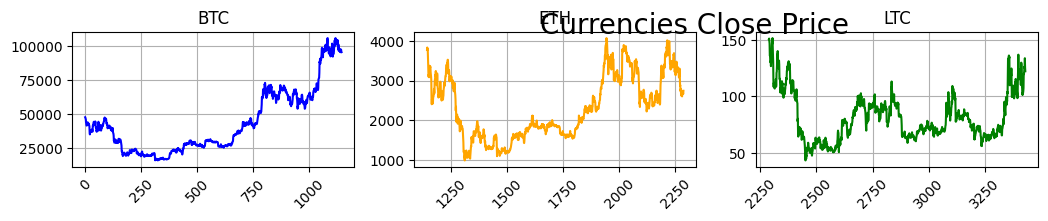

In [12]:
#The code creates a figure to visualize the close prices of different cryptos
fig = plt.figure(figsize=(14, 12))
fig.suptitle('Currencies Close Price', fontsize=20, y=0.95)

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

for i, coin in enumerate(coin_list):
    data = crypto[crypto['crypto_name'] == coin]
    ax = fig.add_subplot(6, 4, i+1)
    ax.plot(data.index, data['Close'], color=colors[i%len(colors)])
    ax.set_title(coin, fontsize=12)
    ax.tick_params(axis='x', labelrotation=45)
    ax.grid(True)
#The code generates a visually appealing visualization of the close prices of different cryptos in grid layout
plt.tight_layout()
plt.show()

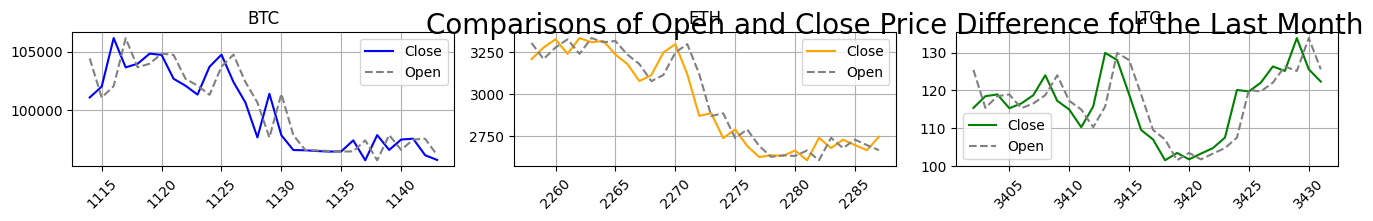

In [13]:
#Visualisation of the comparison of the open and close price diff for the last month of data for diff cryptos.
fig = plt.figure(figsize=(18, 12))
fig.suptitle('Comparisons of Open and Close Price Difference for the Last Month', fontsize=20, y=0.95)

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

for i, coin in enumerate(coin_list):
    data = crypto[crypto['crypto_name'] == coin]
    ax = fig.add_subplot(6, 4, i+1)
    ax.plot(data.index[-30:], data['Close'][-30:], color=colors[i%len(colors)], label='Close')
    ax.plot(data.index[-30:], data['Open'][-30:], color='gray', linestyle='--', label='Open')
    ax.set_title(coin, fontsize=12)
    ax.tick_params(axis='x', labelrotation=45)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

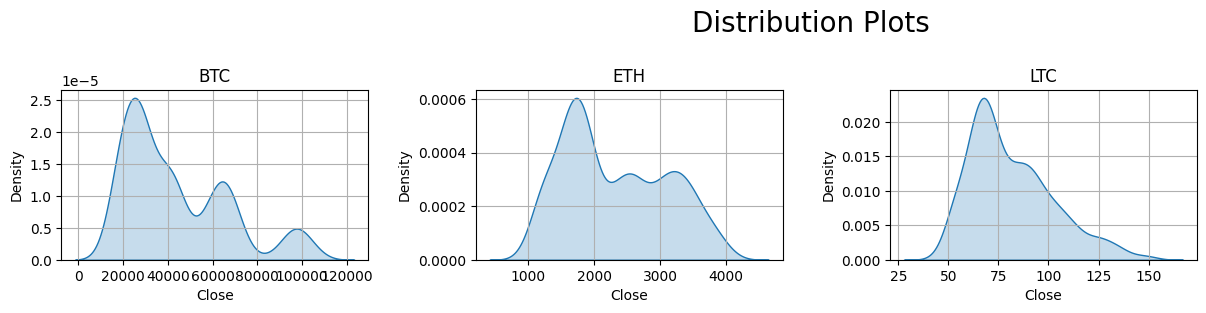

In [14]:
#Visualisation Plots
plt.figure(figsize=(20, 20))
plt.suptitle("Distribution Plots", fontsize=20, y=0.92)

colors = sns.color_palette("husl", len(coin_list))

for i, coin in enumerate(coin_list):
    data = crypto[crypto["crypto_name"]==coin]
    ax = plt.subplot(6, 4, i+1)
    sns.kdeplot(data=data, x=data.Close, palette=colors[i%len(colors)], shade=True)
    ax.set_title(coin, fontsize=12)
    ax.grid(True)

plt.subplots_adjust(wspace=0.35, bottom=0.2, hspace=0.4)
plt.show()

In [15]:
# slicing single coin for further analysis
coin_ = "ETH"
coin_df = crypto[crypto["crypto_name"]==coin_]

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Volume'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>, <Axes: >]], dtype=object)

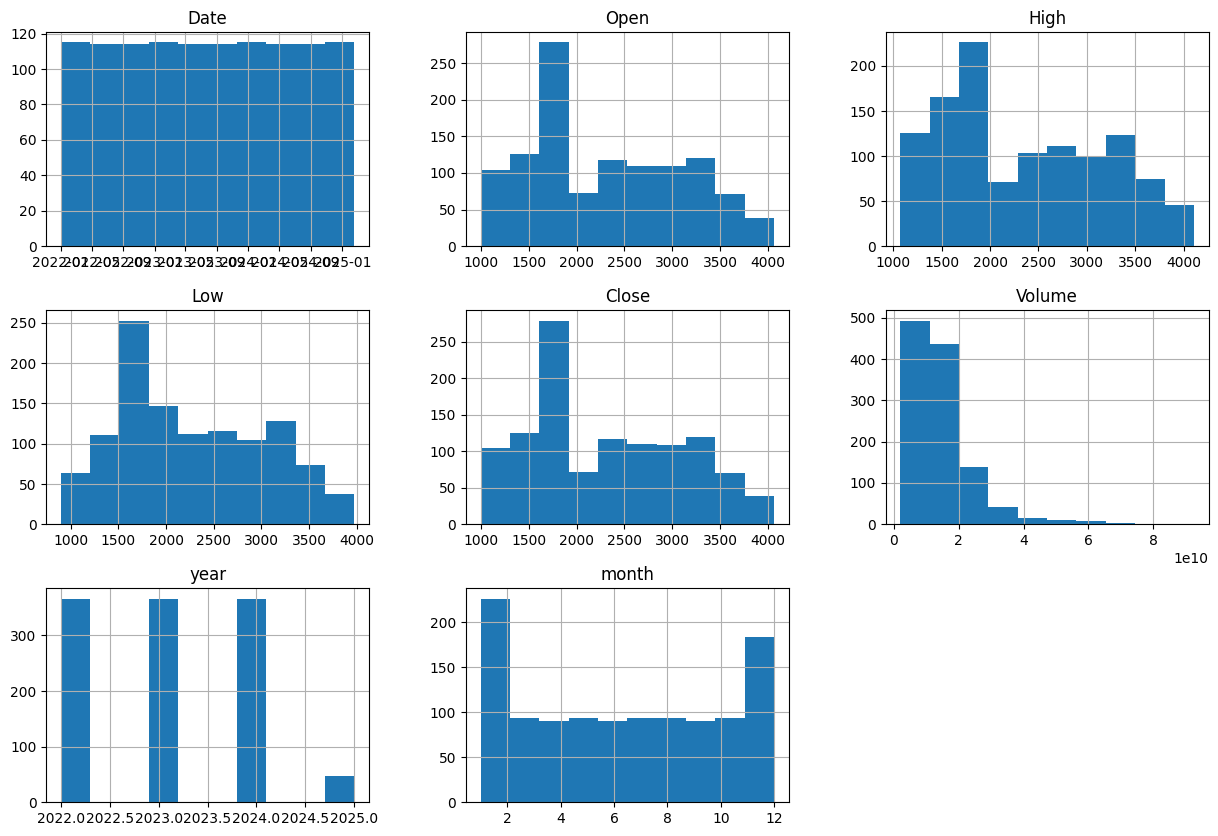

In [16]:
coin_df.hist(figsize=(15,10))

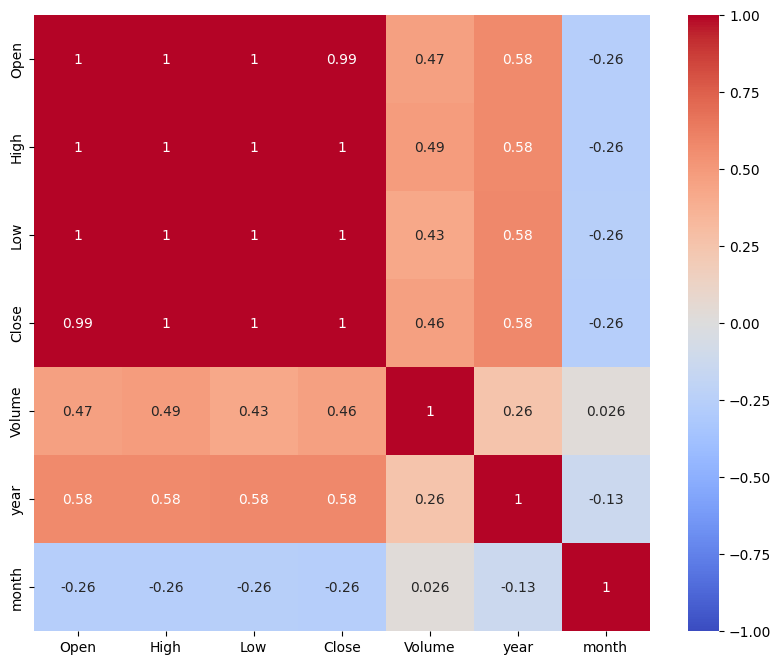

In [17]:
# Select only numeric columns for correlation
numeric_cols = coin_df.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, vmin=-1.0, annot=True, square=True, cmap='coolwarm')
plt.show()

Label Encoding

In [18]:
# In order to initialise label encoding
df_encoded = crypto.copy()
label_encoder = LabelEncoder()
label_encoder.fit(df_encoded["crypto_name"])
df_encoded["crypto_encoded"] = label_encoder.transform(df_encoded["crypto_name"])
df_encoded


,Date,Open,High,Low,Close,Volume,crypto_name,year,month,crypto_encoded
0,2022-01-01 00:00:00+00:00,46311.746094,47827.312500,46288.484375,47686.812500,24582667004,BTC,2022,1,0
1,2022-01-02 00:00:00+00:00,47680.925781,47881.406250,46856.937500,47345.218750,27951569547,BTC,2022,1,0
2,2022-01-03 00:00:00+00:00,47343.542969,47510.726562,45835.964844,46458.117188,33071628362,BTC,2022,1,0
3,2022-01-04 00:00:00+00:00,46458.851562,47406.546875,45752.464844,45897.574219,42494677905,BTC,2022,1,0
4,2022-01-05 00:00:00+00:00,45899.359375,46929.046875,42798.222656,43569.003906,36851084859,BTC,2022,1,0
...,...,...,...,...,...,...,...,...,...,...
3427,2025-02-13 00:00:00+00:00,122.043755,129.004333,119.335396,126.317780,1368690456,LTC,2025,2,2
3428,2025-02-14 00:00:00+00:00,126.320267,133.581024,124.804764,125.126740,1541689997,LTC,2025,2,2
3429,2025-02-15 00:00:00+00:00,125.123390,134.512344,124.566856,133.840439,1346292179,LTC,2025,2,2
3430,2025-02-16 00:00:00+00:00,133.846634,137.171326,125.266548,125.554382,1226603117,LTC,2025,2,2


Importance Feature

In [19]:
# In order to initialise label encoding
df_encoded = crypto.copy()
label_encoder = LabelEncoder()
label_encoder.fit(df_encoded["crypto_name"])
df_encoded["crypto_encoded"] = label_encoder.transform(df_encoded["crypto_name"])
df_encoded

,Date,Open,High,Low,Close,Volume,crypto_name,year,month,crypto_encoded
0,2022-01-01 00:00:00+00:00,46311.746094,47827.312500,46288.484375,47686.812500,24582667004,BTC,2022,1,0
1,2022-01-02 00:00:00+00:00,47680.925781,47881.406250,46856.937500,47345.218750,27951569547,BTC,2022,1,0
2,2022-01-03 00:00:00+00:00,47343.542969,47510.726562,45835.964844,46458.117188,33071628362,BTC,2022,1,0
3,2022-01-04 00:00:00+00:00,46458.851562,47406.546875,45752.464844,45897.574219,42494677905,BTC,2022,1,0
4,2022-01-05 00:00:00+00:00,45899.359375,46929.046875,42798.222656,43569.003906,36851084859,BTC,2022,1,0
...,...,...,...,...,...,...,...,...,...,...
3427,2025-02-13 00:00:00+00:00,122.043755,129.004333,119.335396,126.317780,1368690456,LTC,2025,2,2
3428,2025-02-14 00:00:00+00:00,126.320267,133.581024,124.804764,125.126740,1541689997,LTC,2025,2,2
3429,2025-02-15 00:00:00+00:00,125.123390,134.512344,124.566856,133.840439,1346292179,LTC,2025,2,2
3430,2025-02-16 00:00:00+00:00,133.846634,137.171326,125.266548,125.554382,1226603117,LTC,2025,2,2


In [20]:
# Code to divide the dataset into X and y
X = df_encoded.drop(['Close', 'crypto_name', 'Date'], axis=1)
y = df_encoded['Close']

#Code written to create a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

#Code written to fit the model
rf.fit(X, y)

#To estimate the feature importance
importance = rf.feature_importances_

#To make a dataframe which displays the feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance}).sort_values('Importance', ascending=False)

# To see the feature importance
print(feature_importance)

          Feature  Importance
1            High    0.567216
2             Low    0.276987
0            Open    0.128436
6  crypto_encoded    0.027305
3          Volume    0.000041
5           month    0.000013
4            year    0.000002


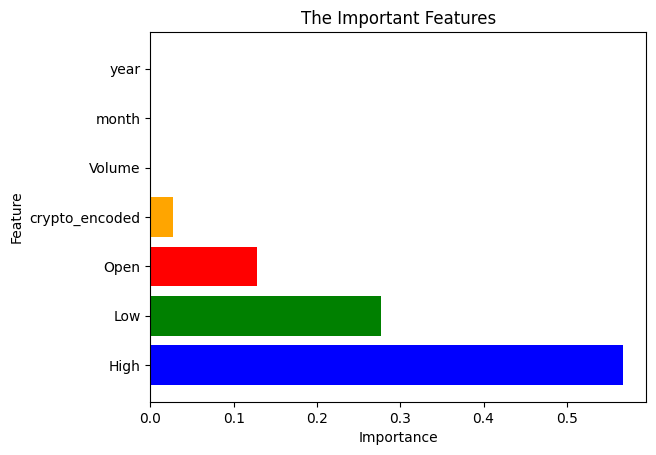

In [21]:
# To create a color palette for the bars
colors = ['blue', 'green', 'red', 'orange', 'purple']

# To plot the feature importance as horizontal bars with different colors
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color=colors)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('The Important Features')
plt.show()

Scaling The Features

In [22]:
# scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(df_encoded[["Open", "High", "Low", "Close", "crypto_encoded"]])


def myScaler(data):
    global scaler
    data_ = data.copy()
    data_scaled_ = scaler.transform(data_)
    data_scaled_ = pd.DataFrame(data_scaled_, columns=data_.columns)
    data_scaled_.index = data_.index
    return data_scaled_

def myInverseScale(data):
    global scaler
    data_scaler_inverse = scaler.inverse_transform(data)
    data_scaler_inverse = pd.DataFrame(data_scaler_inverse, columns=data.columns)
    data_scaler_inverse.index = data.index
    return data_scaler_inverse

In [23]:
to_scale = df_encoded[["Open", "High", "Low", "Close", "crypto_encoded"]]
df_scaled = myScaler(to_scale)

In [24]:
df_scaled.head()

,Open,High,Low,Close,crypto_encoded
0,0.436067,0.438083,0.439405,0.449031,0.0
1,0.448971,0.438579,0.444806,0.445811,0.0
2,0.445791,0.435181,0.435105,0.437451,0.0
3,0.437453,0.434225,0.434312,0.432168,0.0
4,0.432180,0.429847,0.406243,0.410221,0.0


Deployment of Model

In [25]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
%pip install xgboost
from xgboost import XGBRegressor
from scipy.stats import randint
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
#Keep the Date in your DataFrame:
df_encoded["Date"] = crypto["Date"]

#Keep the Date in your DataFrame:
df_encoded["Date"] = crypto["Date"]  

#Split out numeric columns for X, but keep the index to rejoin:
X = df_encoded.drop(['Close', 'crypto_name', 'Date'], axis=1)
y = df_encoded['Close']



R-square: 0.01744491291066519
Mean Absolute Error: 2.8255943717012584
Mean Squared Error: 271.95201110657365


<Axes: xlabel='Date'>

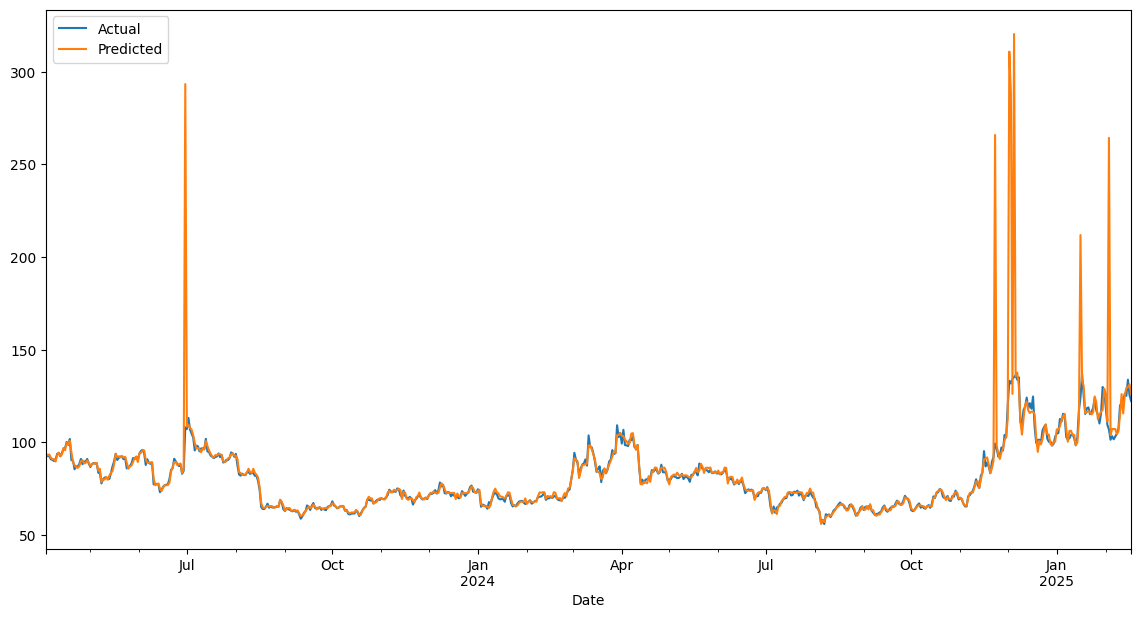

In [27]:
#Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False)

# 4) Also keep track of the date for the test set
dates_test = df_encoded.loc[X_test.index, "Date"]

# 5) Train your model
model = RandomForestRegressor()
model.fit(X_train, y_train)
predicted = model.predict(X_test)

# 6) Re-create a DataFrame with actual and predicted values, plus the date
results = pd.DataFrame({
    "Date": dates_test,
    "Actual": y_test,
    "Predicted": predicted
})

print(f'R-square: {r2_score(y_test, predicted)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, predicted)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, predicted)}')

#Now you can plot using Date as x-axis
results.sort_values("Date", inplace=True)  # if needed
results.set_index("Date", inplace=True)
results[["Actual", "Predicted"]].plot(figsize=(14, 7))

Hyperparameter fine-tunning

In [28]:
# Create a RandomForestRegressor object
rf = RandomForestRegressor()

# Define the hyperparameter space
param_dist = {
    'n_estimators': randint(1, 50),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False],
    'max_features': ['sqrt', 'log2', 1.0, None]  # <-- Valid options
}


# Define the rolling-window cross-validation split
tscv = TimeSeriesSplit(n_splits=5)

# Create a RandomizedSearchCV object with rolling-window cross-validation
random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_dist,
                                   n_iter=100,
                                   cv=tscv,
                                   random_state=42)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X, y)

# Print the best parameters and score
print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Best Parameters:  {'bootstrap': False, 'max_depth': 16, 'max_features': 1.0, 'min_samples_leaf': 3, 'min_samples_split': 13, 'n_estimators': 3}
Best Score:  -427.2478947318758


R-square: 0.9996251776139805
Mean Absolute Error: 0.0019194439096235606
Mean Squared Error: 2.0946576787381348e-05


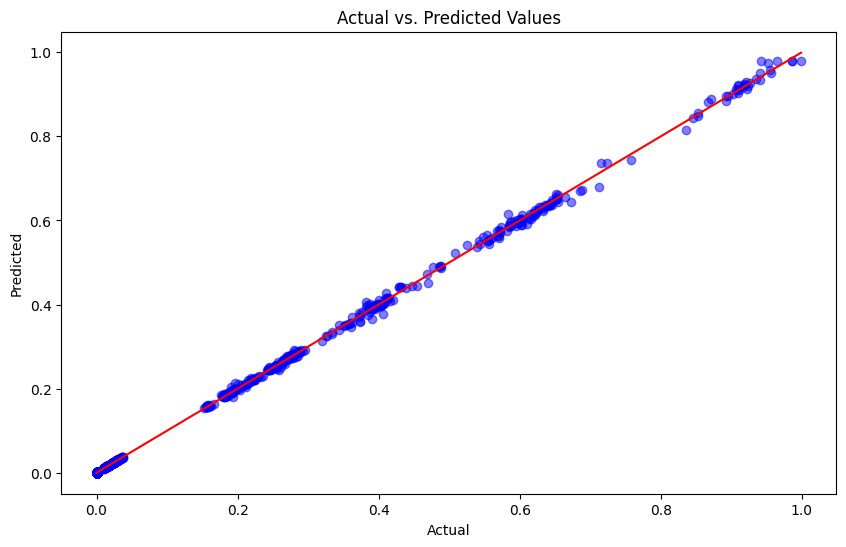

In [29]:
X = df_scaled.drop('Close', axis=1)
y = df_scaled['Close']

# train-test spliting of dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=1)

#checking the shape of the train and test data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

model = RandomForestRegressor(bootstrap=True, max_depth=18, max_features='sqrt',
                              min_samples_leaf=2, min_samples_split=11, n_estimators=36)
model.fit(X_train, y_train)

predicted = model.predict(X_test)

print(f'R-square: {r2_score(y_test, predicted)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, predicted)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, predicted)}')

# Plotting the predicted values against the actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicted, color='blue', alpha=0.5)
plt.plot(np.linspace(0, np.max(y_test), 100), np.linspace(0, np.max(y_test), 100), color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

Using Random Forest to Predict Time series 

In [30]:
import pandas as pd
df = pd.read_csv("mycrypto.csv", parse_dates=["Date"])
df.sort_values("Date", inplace=True)


In [38]:
df.tail()

,Date,Open,High,Low,Close,Volume,crypto_name,year,month,Close_lag1,Close_lag2,Close_lag3
1142,2025-02-16 00:00:00+00:00,97580.492188,97725.593750,96060.976562,96175.031250,16536755396,BTC,2025,2,125.554382,97580.351562,133.840439
2286,2025-02-16 00:00:00+00:00,2693.562500,2724.096436,2655.297607,2663.315918,10593602117,ETH,2025,2,96175.031250,125.554382,97580.351562
2287,2025-02-17 00:00:00+00:00,2663.229492,2848.784180,2640.182129,2743.199707,24170425078,ETH,2025,2,2663.315918,96175.031250,125.554382
1143,2025-02-17 00:00:00+00:00,96179.007812,97032.234375,95243.546875,95773.382812,27336550690,BTC,2025,2,2743.199707,2663.315918,96175.031250
3431,2025-02-17 00:00:00+00:00,125.552780,128.565384,120.526299,122.307846,1088409484,LTC,2025,2,95773.382812,2743.199707,2663.315918


In [31]:
df["Close_lag1"] = df["Close"].shift(1)
df["Close_lag2"] = df["Close"].shift(2)
df["Close_lag3"] = df["Close"].shift(3)
# Drop rows with NaN from shifting
df.dropna(inplace=True)


In [32]:
X = df[["Close_lag1", "Close_lag2", "Close_lag3"]]
y = df["Close"]


In [33]:
train_size = int(len(df) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]


In [34]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)


In [35]:
predictions = model.predict(X_test)


In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)


Mean Absolute Error (MAE): 29590.50446959226
Mean Squared Error (MSE): 1259962249.1055207
Root Mean Squared Error (RMSE): 35495.94693912983
R^2 Score: 0.1047606913246173


In [42]:
cryptos = ["BTC", "ETH", "LTC"]
all_future_preds = []

for c in cryptos:
    # Subset the DataFrame for this crypto
    df_c = df[df["crypto_name"] == c].copy()
    df_c.sort_values("Date", inplace=True)

    #Created lagged features for df_c
    df_c["Close_lag1"] = df_c["Close"].shift(1)
    df_c.dropna(inplace=True)

    #Training the model for this crypto
    X_c = df_c[["Close_lag1"]]  # or more features
    y_c = df_c["Close"]
    from sklearn.ensemble import RandomForestRegressor
    # For simplicity, I fitted the model on the entire dataset for this crypto.
    model_c = RandomForestRegressor(random_state=42)
    model_c.fit(X_c, y_c)

    # 4) Predict the future for this crypto using iterative approach
    #    (We'll just show a minimal example for 7 days)
    n_future = 7
    future_predictions = []
    
    # Get the last known close to seed the forecast
    last_close = df_c.iloc[-1]["Close"]
    
    for i in range(n_future):
        #To Build the features for day i
        X_future = [[last_close]] 
        pred_close = model_c.predict(X_future)[0]
        
        future_predictions.append(pred_close)
        # Shift the lag
        last_close = pred_close

    #To get the last historical date from df_c
    last_date = df_c["Date"].iloc[-1]
    #To create a list of future dates (one per future day)
    future_dates = [last_date + pd.Timedelta(days=x) for x in range(1, n_future+1)]
    
    #To build the forecast DataFrame with these dates instead of "Day"
    future_df_c = pd.DataFrame({
        "Date": future_dates,
        "Predicted_Close": future_predictions,
        "crypto_name": c
    })
    
    #To append the result to the list
    all_future_preds.append(future_df_c)

#To combine all forecasts
final_future_df = pd.concat(all_future_preds, ignore_index=True)
print(final_future_df)

                        Date  Predicted_Close crypto_name
0  2025-02-18 00:00:00+00:00     95220.876953         BTC
1  2025-02-19 00:00:00+00:00     93810.571953         BTC
2  2025-02-20 00:00:00+00:00     93426.597187         BTC
3  2025-02-21 00:00:00+00:00     94001.815703         BTC
4  2025-02-22 00:00:00+00:00     96211.981250         BTC
5  2025-02-23 00:00:00+00:00     96597.502812         BTC
6  2025-02-24 00:00:00+00:00     98812.016875         BTC
7  2025-02-18 00:00:00+00:00      2671.887280         ETH
8  2025-02-19 00:00:00+00:00      2689.953210         ETH
9  2025-02-20 00:00:00+00:00      2631.635334         ETH
10 2025-02-21 00:00:00+00:00      2637.850891         ETH
11 2025-02-22 00:00:00+00:00      2625.850291         ETH
12 2025-02-23 00:00:00+00:00      2606.995847         ETH
13 2025-02-24 00:00:00+00:00      2596.732480         ETH
14 2025-02-18 00:00:00+00:00       126.486554         LTC
15 2025-02-19 00:00:00+00:00       125.149111         LTC
16 2025-02-20 

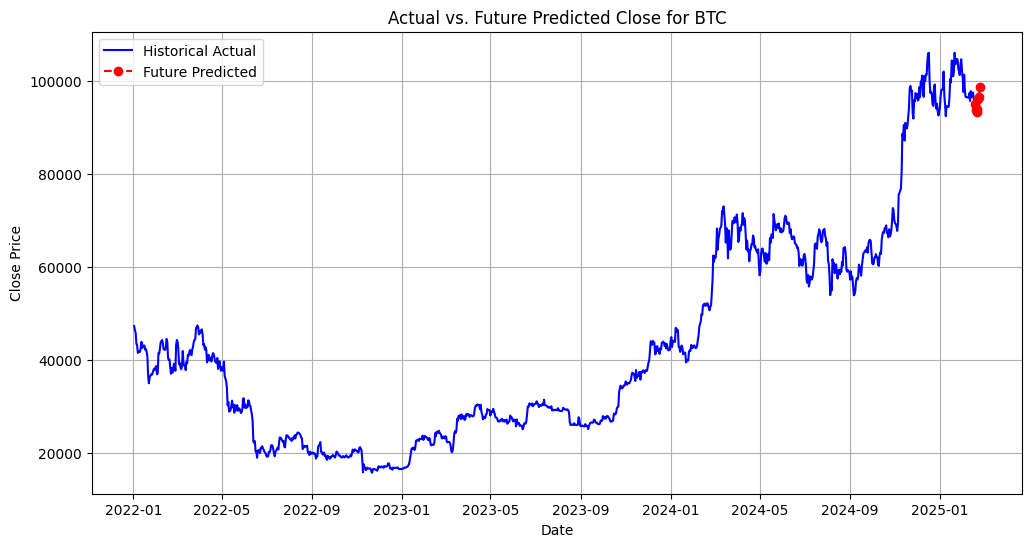

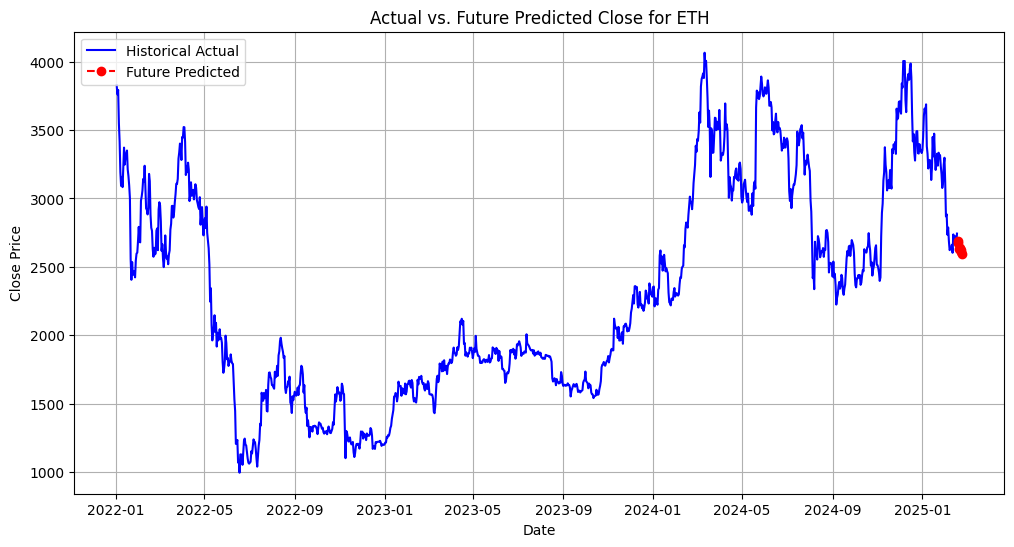

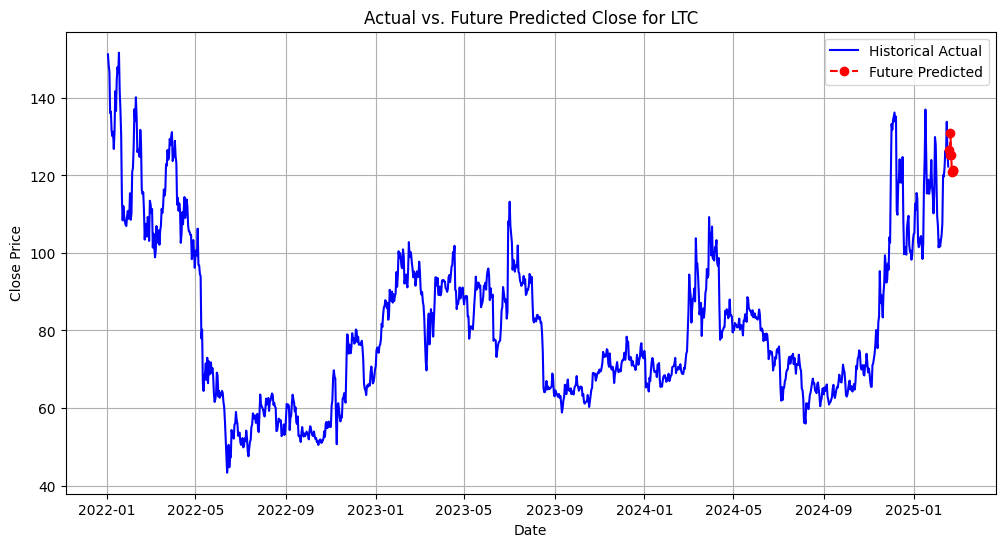

In [43]:
import matplotlib.pyplot as plt

cryptos = ["BTC", "ETH", "LTC"]

for c in cryptos:
    #Subset historical data for this crypto
    df_c = df[df["crypto_name"] == c].copy()
    df_c.sort_values("Date", inplace=True)
    
    #To get future predictions for this crypto
    future_df_c = final_future_df[final_future_df["crypto_name"] == c]
    
    plt.figure(figsize=(12,6))
    plt.plot(df_c["Date"], df_c["Close"], label="Historical Actual", color="blue")
    plt.plot(future_df_c["Date"], future_df_c["Predicted_Close"], 
             label="Future Predicted", marker="o", linestyle="--", color="red")
    
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.title(f"Actual vs. Future Predicted Close for {c}")
    plt.legend()
    plt.grid(True)
    plt.show()


To see the Actual VS Predicted of the 3 cryptos

BTC Metrics: R² = 0.9994, MSE = 350344.7161, RMSE = 591.8992


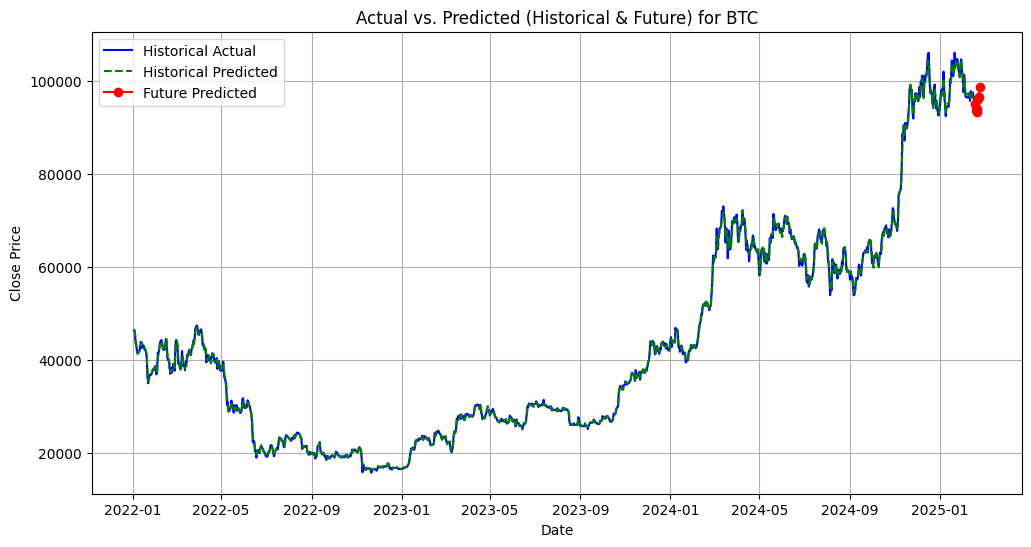

ETH Metrics: R² = 0.9975, MSE = 1531.8909, RMSE = 39.1394


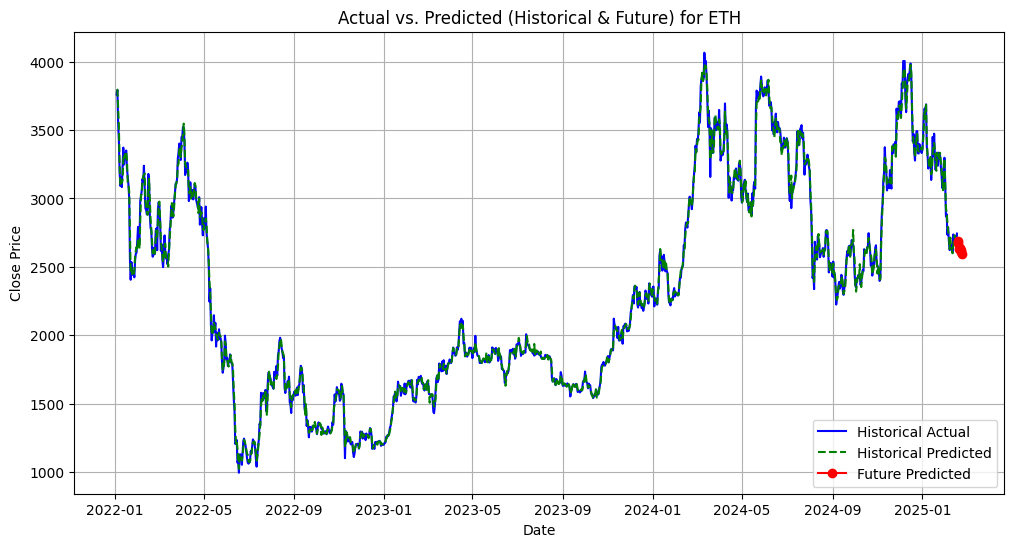

LTC Metrics: R² = 0.9940, MSE = 2.6041, RMSE = 1.6137


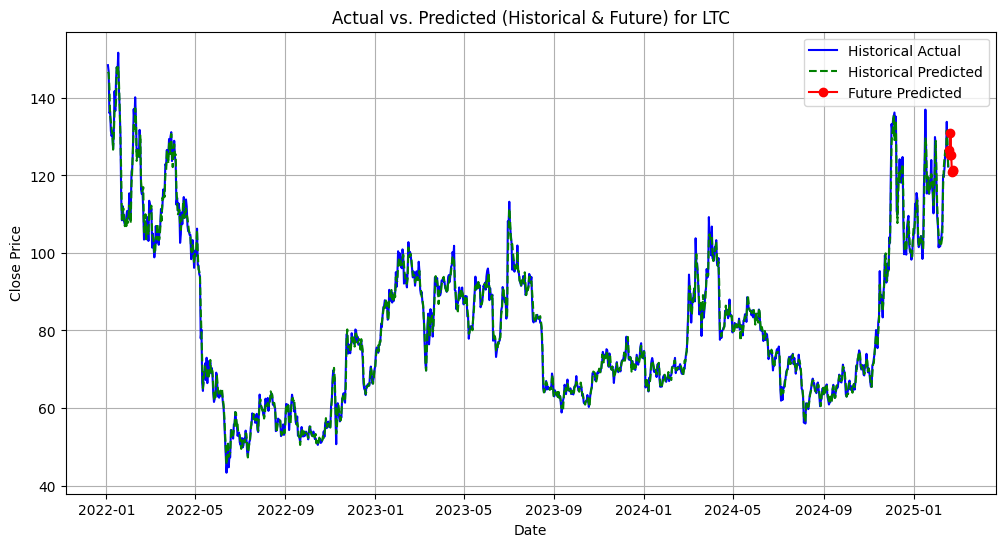

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from joblib import dump

cryptos = ["BTC", "ETH", "LTC"]

for c in cryptos:
    #Subset historical data for this crypto and sort by date.
    df_c = df[df["crypto_name"] == c].copy()
    df_c.sort_values("Date", inplace=True)
    
    #Create lagged feature(s). Here we use one lag: previous day's close.
    df_c["Close_lag1"] = df_c["Close"].shift(1)
    df_c.dropna(inplace=True)  # remove first row with NaN lag
    
    #To prepare features and target, then train a RandomForestRegressor.
    X_c = df_c[["Close_lag1"]]
    y_c = df_c["Close"]
    model_c = RandomForestRegressor(random_state=42)
    model_c.fit(X_c, y_c)
    
    #To predict historical values using the lagged feature.
    df_c["Predicted_Close"] = model_c.predict(X_c)
    
    #To evaluate the model on historical data.
    r2 = r2_score(y_c, df_c["Predicted_Close"])
    mse = mean_squared_error(y_c, df_c["Predicted_Close"])
    rmse = mse ** 0.5
    print(f"{c} Metrics: R² = {r2:.4f}, MSE = {mse:.4f}, RMSE = {rmse:.4f}")
    
    #To Save the model to a file.
    dump(model_c, f"model_{c}.joblib")
    
    #To generate future predictions iteratively.
    n_future = 7  # forecast for 7 future days
    future_predictions = []
    last_close = df_c.iloc[-1]["Close"]  # seed with the last actual close
    
    for i in range(n_future):
        X_future = [[last_close]]  # using only one lag
        pred_close = model_c.predict(X_future)[0]
        future_predictions.append(pred_close)
        last_close = pred_close  # update for the next day

    #To generate future dates based on the last historical date.
    last_date = df_c["Date"].iloc[-1]
    future_dates = [last_date + pd.Timedelta(days=x) for x in range(1, n_future+1)]
    
    #To create a DataFrame for future predictions.
    future_df_c = pd.DataFrame({
        "Date": future_dates,
        "Predicted_Close": future_predictions,
        "crypto_name": c
    })
    
    #To plot historical actual, historical predicted, and future forecast.
    plt.figure(figsize=(12,6))
    
    #To plot historical actual Close.
    plt.plot(df_c["Date"], df_c["Close"], label="Historical Actual", color="blue")
    
    #To plot historical predicted Close.
    plt.plot(df_c["Date"], df_c["Predicted_Close"], label="Historical Predicted", 
             color="green", linestyle="--")
    
    #To plot future predictions.
    plt.plot(future_df_c["Date"], future_df_c["Predicted_Close"], label="Future Predicted", 
             marker="o", color="red")
    
    plt.title(f"Actual vs. Predicted (Historical & Future) for {c}")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.legend()
    plt.grid(True)
    plt.show()


In [54]:
pip install flask joblib pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
